In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import time
import os,jpype
import json_lines
from tqdm import tqdm

In [33]:
gpt2_small_loss=[
    0.29165437588479864,
    0.2519020693792908,
    0.2364710304808644,
    0.22640587982783017,
    0.2187355733401172,
    0.20908355432532774,
    0.20767991814369843,
    0.20619545993261165,
    0.20564798010577,
    0.20482023490744478
]
opt_125m_loss=[
      0.2841341977309109,
    0.23510838080007435,
    0.21783199377507534,
      0.20577942111814398,
    0.19680213066919305,
     0.1799096386890115,
    0.17560600773644808,
    0.17310405310645377,
    0.17122450410811724,
    0.16986053939620474
]
gptneo_125m_loss=[
    0.24861243620179505,
    0.22355825071885482,
    0.21175976107137293,
    0.20315899579127497,
    0.19558122802588715,
    0.18519710095960157,
     0.1837568407580054,
    0.18289567544577173,
    0.18207688342392878,
    0.18132050963674018
]
opt_350m_loss=[
    0.2720139530893911,
    0.22572494026861925,
     0.2075788910675019,
    0.19492625258724086,
    0.18552410330876798,
    0.16087096651870403,
    0.15388504206888745,
    0.15014758434501832,
    0.14730954607994834,
    0.14453828637657423
]
gpt2_large_loss=[
     0.23077496666141747,
    0.1895250240977536,
    0.1684048249764994,
    0.15252031630481888,
    0.13895523307598212,
    0.11512634081803827,
    0.10904870102430554,
    0.10559957411629574,
    0.10248184703103697,
     0.09973363875395796
]

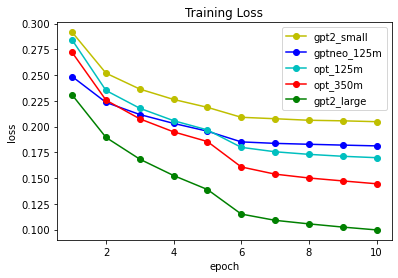

In [34]:
y=[x for x in range(1,11)]
plt.plot(y,gpt2_small_loss,'yo-',label='gpt2_small')
plt.plot(y,gptneo_125m_loss,'bo-',label='gptneo_125m')
plt.plot(y,opt_125m_loss,'co-',label='opt_125m')
plt.plot(y,opt_350m_loss,'ro-',label='opt_350m')
plt.plot(y,gpt2_large_loss,'go-',label='gpt2_large')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Model Compare

# gpt2-small

In [35]:
result_v7=pd.read_csv("GPT2_small_valid_Sample_2000.csv")  

In [36]:
result_v7.describe()

Unnamed: 0   Index        Token         Line    precision       recall
count  2000.000000  2000.0  2000.000000  2000.000000  2000.000000  2000.000000
mean    999.500000     0.0     0.405663     0.414752     0.281415     0.272195
std     577.494589     0.0     0.408334     0.237295     0.297352     0.291931
min       0.000000     0.0     0.000000     0.000000     0.000000     0.000000
25%     499.750000     0.0     0.000000     0.267375     0.000000     0.000000
50%     999.500000     0.0     0.250000     0.371750     0.200000     0.200000
75%    1499.250000     0.0     1.000000     0.527300     0.457550     0.400000
max    1999.000000     0.0     1.000000     1.000000     1.000000     1.000000

In [37]:
acc_1=[round(result_v7.describe()["Line"]["mean"],4),
      round(result_v7.describe()["precision"]["mean"],4),
      round(result_v7.describe()["recall"]["mean"],4)
      ]
acc_1

[0.4148, 0.2814, 0.2722]

# gpt-neo-125m

In [38]:
result_v8=pd.read_csv("GPT_neo_125m_valid_Sample_2000.csv")  

In [39]:
result_v8.describe()

Unnamed: 0   Index        Token         Line    precision       recall
count  2000.000000  2000.0  2000.000000  2000.000000  2000.000000  2000.000000
mean    999.500000     0.0     0.388550     0.406346     0.267689     0.263542
std     577.494589     0.0     0.406999     0.234401     0.291556     0.287708
min       0.000000     0.0     0.000000     0.000000     0.000000     0.000000
25%     499.750000     0.0     0.000000     0.255900     0.000000     0.000000
50%     999.500000     0.0     0.222200     0.363200     0.200000     0.200000
75%    1499.250000     0.0     1.000000     0.518500     0.400000     0.400000
max    1999.000000     0.0     1.000000     1.000000     1.000000     1.000000

In [40]:
acc_2=[round(result_v8.describe()["Line"]["mean"],4),
      round(result_v8.describe()["precision"]["mean"],4),
      round(result_v8.describe()["recall"]["mean"],4)
      ]
acc_2

[0.4063, 0.2677, 0.2635]

# opt-125m

In [41]:
result_v9=pd.read_csv("opt_125m_valid_Sample_2000.csv")  

In [42]:
result_v9.describe()

Unnamed: 0   Index        Token         Line   precision       recall
count  2000.000000  2000.0  2000.000000  2000.000000  2000.00000  2000.000000
mean    999.500000     0.0     0.409306     0.426429     0.29462     0.284474
std     577.494589     0.0     0.414738     0.248273     0.31175     0.306192
min       0.000000     0.0     0.000000     0.000000     0.00000     0.000000
25%     499.750000     0.0     0.000000     0.263925     0.00000     0.000000
50%     999.500000     0.0     0.236100     0.375000     0.22220     0.200000
75%    1499.250000     0.0     1.000000     0.543550     0.50000     0.428600
max    1999.000000     0.0     1.000000     1.000000     1.00000     1.000000

In [43]:
acc_3=[round(result_v9.describe()["Line"]["mean"],4),
      round(result_v9.describe()["precision"]["mean"],4),
      round(result_v9.describe()["recall"]["mean"],4)
      ]
acc_3

[0.4264, 0.2946, 0.2845]

# OPT 350M

In [44]:
result_v10=pd.read_csv("OPT_350m_valid_Sample_2000.csv")  

In [45]:
result_v10.describe()

Unnamed: 0   Index        Token         Line    precision       recall
count  2000.000000  2000.0  2000.000000  2000.000000  2000.000000  2000.000000
mean    999.500000     0.0     0.421581     0.433723     0.307685     0.300477
std     577.494589     0.0     0.418908     0.254415     0.319172     0.313058
min       0.000000     0.0     0.000000     0.000000     0.000000     0.000000
25%     499.750000     0.0     0.000000     0.266700     0.000000     0.000000
50%     999.500000     0.0     0.250000     0.377400     0.250000     0.222200
75%    1499.250000     0.0     1.000000     0.555750     0.500000     0.500000
max    1999.000000     0.0     1.000000     1.000000     1.000000     1.000000

In [46]:
acc_4=[round(result_v10.describe()["Line"]["mean"],4),
      round(result_v10.describe()["precision"]["mean"],4),
      round(result_v10.describe()["recall"]["mean"],4)
      ]
acc_4

[0.4337, 0.3077, 0.3005]

# GPT2 Large

In [47]:
result_v11=pd.read_csv("GPT_large_valid_Sample_2000.csv")  

In [48]:
result_v11.describe()

Unnamed: 0   Index        Token         Line    precision       recall
count  2000.000000  2000.0  2000.000000  2000.000000  2000.000000  2000.000000
mean    999.500000     0.0     0.450221     0.460217     0.340729     0.329776
std     577.494589     0.0     0.425350     0.260309     0.330167     0.328966
min       0.000000     0.0     0.000000     0.000000     0.000000     0.000000
25%     499.750000     0.0     0.000000     0.276200     0.000000     0.000000
50%     999.500000     0.0     0.285700     0.400000     0.250000     0.250000
75%    1499.250000     0.0     1.000000     0.608025     0.500000     0.500000
max    1999.000000     0.0     1.000000     1.000000     1.000000     1.000000

In [49]:
acc_5=[round(result_v11.describe()["Line"]["mean"],4),
      round(result_v11.describe()["precision"]["mean"],4),
      round(result_v11.describe()["recall"]["mean"],4)
      ]
acc_5

[0.4602, 0.3407, 0.3298]

# Conclusion

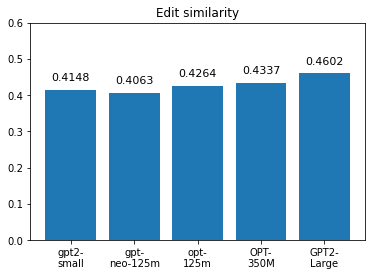

In [50]:
data = [acc_1[0],acc_2[0],acc_3[0],acc_4[0],acc_5[0]]
labels = ['gpt2-\nsmall', 'gpt-\nneo-125m', 'opt-\n125m', 'OPT-\n350M','GPT2-\nLarge']
for a,b in zip([0,1,2,3,4] ,data): 
    plt.text(a, b+0.02, data[a], ha='center', va= 'bottom',fontsize=11) 
plt.bar(range(len(data)), data,tick_label=labels)
plt.ylim((0,0.6))
plt.title('Edit similarity')
plt.show()

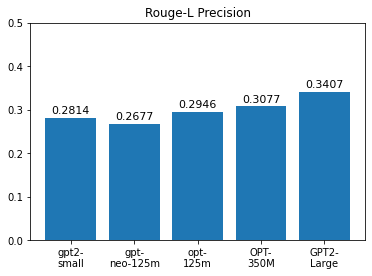

In [51]:
data = [acc_1[1],acc_2[1],acc_3[1],acc_4[1],acc_5[1]]
labels = ['gpt2-\nsmall', 'gpt-\nneo-125m', 'opt-\n125m', 'OPT-\n350M','GPT2-\nLarge']
for a,b in zip([0,1,2,3,4] ,data): 
    plt.text(a, b+0.005, data[a], ha='center', va= 'bottom',fontsize=11) 
plt.bar(range(len(data)), data,tick_label=labels)
plt.ylim((0,0.5))
plt.title('Rouge-L Precision')
plt.show()

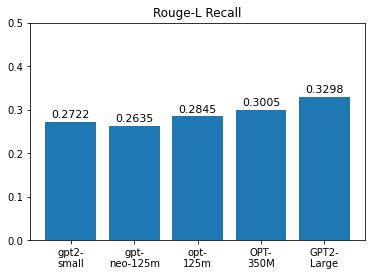

In [52]:
data = [acc_1[2],acc_2[2],acc_3[2],acc_4[2],acc_5[2]]
labels = ['gpt2-\nsmall', 'gpt-\nneo-125m', 'opt-\n125m', 'OPT-\n350M','GPT2-\nLarge']
for a,b in zip([0,1,2,3,4] ,data): 
    plt.text(a, b+0.005, data[a], ha='center', va= 'bottom',fontsize=11) 
plt.bar(range(len(data)), data,tick_label=labels)
plt.ylim((0,0.5))
plt.title('Rouge-L Recall')
plt.show()